In [67]:
import sympy as sm
import numpy as np
from sympy.physics.mechanics import *
init_vprinting()

In [63]:
psi, theta, phi = dynamicsymbols('psi, theta, phi')   # Rotation angles for (3-2-1) set
w1, w2, w3 = dynamicsymbols('omega_1, omega_2, omega_3')   # Angular velocity vector components
t = sm.Symbol('t')
yaw_pitch_roll_rates = sm.Matrix([psi, theta, phi]).diff(t)
omegas = sm.Matrix([w1, w2, w3])

N = ReferenceFrame('N', indices=('1', '2', '3'))
Bp = ReferenceFrame("B'", indices=('1', '2', '3'))
Bpp = ReferenceFrame("B''", indices=('1', '2', '3'))
Bppp = ReferenceFrame("B'''", indices=('1', '2', '3')) # Should equal B
B = ReferenceFrame('B', indices=('1', '2', '3'))

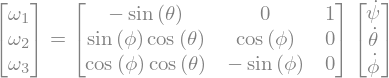

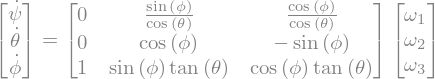

In [66]:
Bp.orient_axis(N, N.z, psi)
Bpp.orient_axis(Bp, Bp.y, theta)
Bppp.orient_axis(Bpp, Bpp.x, phi)

B.orient_body_fixed(N, (psi, theta, phi), '321')
w_BN = B.ang_vel_in(N)
w_raw = sm.diff(psi, t)*N.z + sm.diff(theta, t)*Bp.y + sm.diff(phi, t)*B.x

wA, wb = sm.linear_eq_to_matrix(w_BN.to_matrix(B), list(yaw_pitch_roll_rates.iter_values()))
# Display equation w = [C]*r
display(sm.Eq(omegas, sm.MatMul(wA, yaw_pitch_roll_rates, evaluate=False)))

wA_inv = sm.trigsimp(wA.inv())
# Display equation r = [C^-1]*w
display(sm.Eq(yaw_pitch_roll_rates, sm.MatMul(wA_inv, omegas, evaluate=False)))

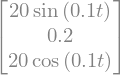

In [70]:
wA_inv.subs({psi: np.radians(40),
             theta: np.radians(30),
             phi: np.radians(80)})
omegas.subs({w1: sm.sin(0.1*t),
             w2: 0.01,
             w3: sm.cos(0.1*t)})*20